El dataset que utilizaran contiene extractos de poemas/historias creadas por 3 reconocidos autores

- Mary Shelley: Autora de "Frankenstein"

- Edgar Allan Poe: Autor de Poemas como "El Cuervo"

- HP Lovecraft: Autor de libros como "El Necronomicon"

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
%matplotlib inline
import spacy
from sklearn.manifold import TSNE

# Cargar modelo de spaCy con vectores (Word2Vec estilo)
nlp = spacy.load('en_core_web_md')
from nltk import word_tokenize, ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#1. Crear grafico de barras con el numero de muestras para cada autor
df = pd.read_csv('/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/authors_examen.csv')
df = df[['author', 'text']]
df = df.dropna()
df['author'].unique()

array(['Edgar Allan Poe', 'HP Lovecraft', 'Mary Shelley'], dtype=object)

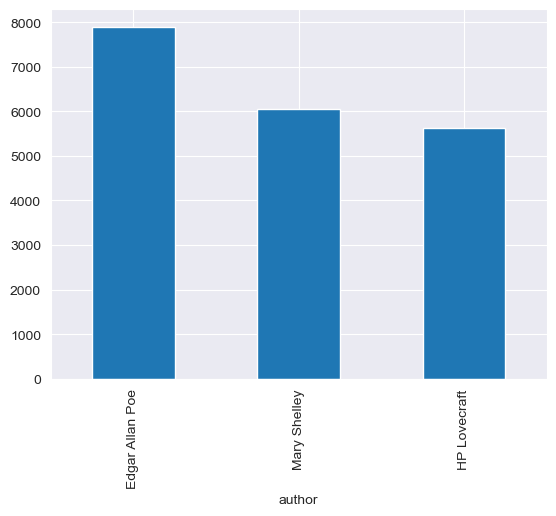

In [36]:
#1. Crear grafico de barras con el numero de muestras para cada autor
df['author'].value_counts().plot(kind='bar')
plt.show()

In [37]:
# Poner un comentario sobre el balance/desbalance de los datos. Existe alguna categoria sobre/sub representada? Como podria afectar esto al entrenamiento? (Profundizar en su respuesta)

Podemos observar que el dataset tiene un balance aceptable entre las 3 clases, sin embargo, la clase de Edgar Allan Poe tiene un poco más de muestras que las otras dos clases. Esto podría afectar el entrenamiento del modelo, ya que podría aprender a predecir mejor la clase con más muestras y tener un rendimiento inferior en las clases con menos muestras. Para mitigar este problema, se podrían aplicar técnicas de balanceo de datos, como el sobremuestreo o submuestreo, o utilizar técnicas de ajuste de pesos en el modelo. Otra opción sería utilizar técnicas de ponderación de clases en la función de pérdida del modelo, para que el modelo preste más atención a las clases menos representadas.

In [39]:
#Crear graficos de barras para cada autor. Los graficos de barras deberan mostrar unigramas, bigramas, trigramas y n-gramas=4 (tetragramas?)
def generar_texto_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    n_gram_strings = [' '.join(gram) for gram in n_grams]
    return " ".join(n_gram_strings)
def contar_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)
def graficar_ngrams(ngrams_counter, titulo):
    ngrams_df = pd.DataFrame(ngrams_counter.most_common(10), columns=['n-gram', 'count'])
    ngrams_df['n-gram'] = ngrams_df['n-gram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10, 6))
    # Actualización para quitar la advertencia
    sns.barplot(x='count', y='n-gram', hue='n-gram', data=ngrams_df, legend=False)
    plt.title(titulo)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.tight_layout()  # Mejora la visualización
    plt.show()


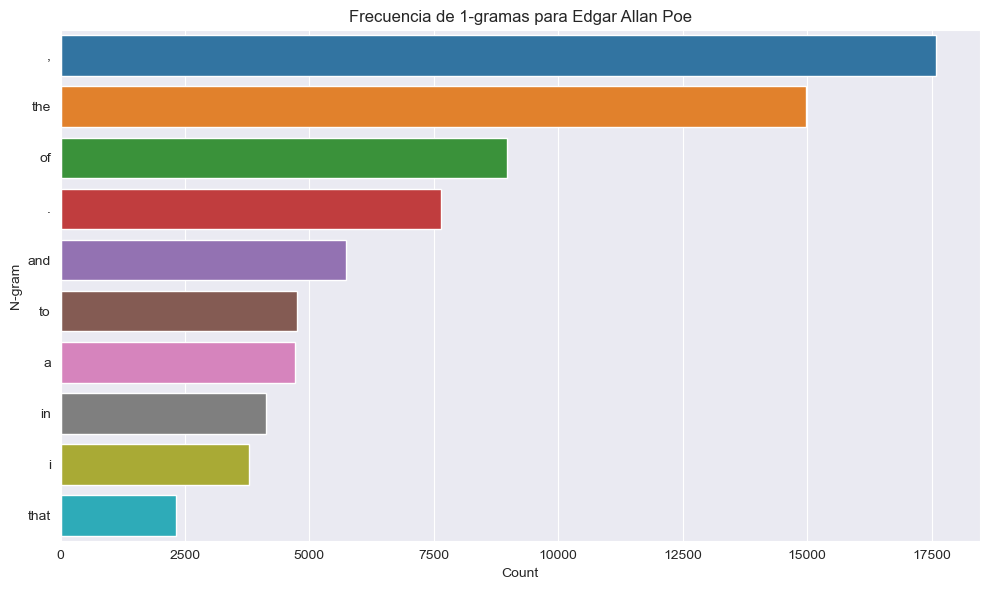

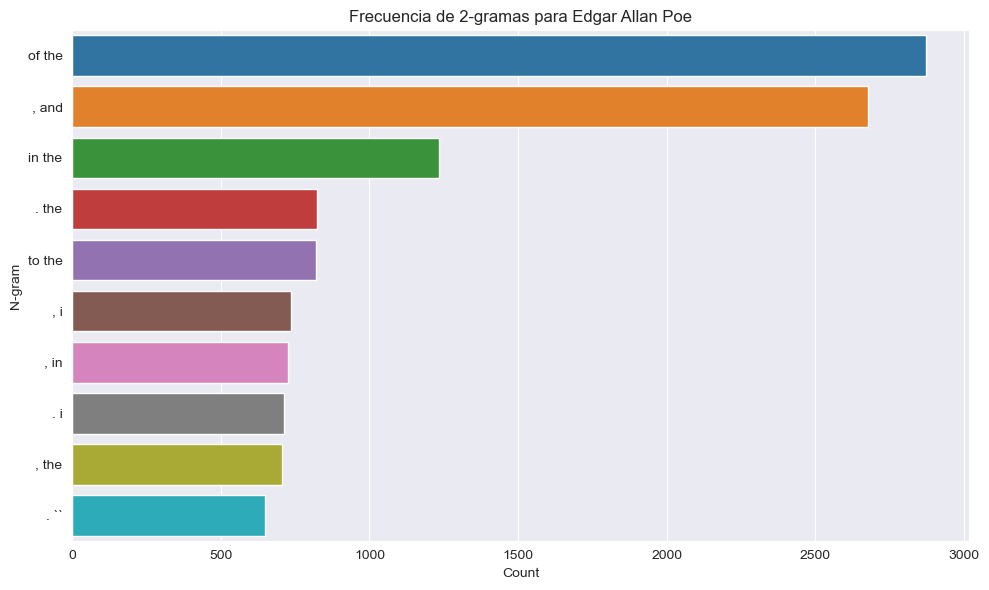

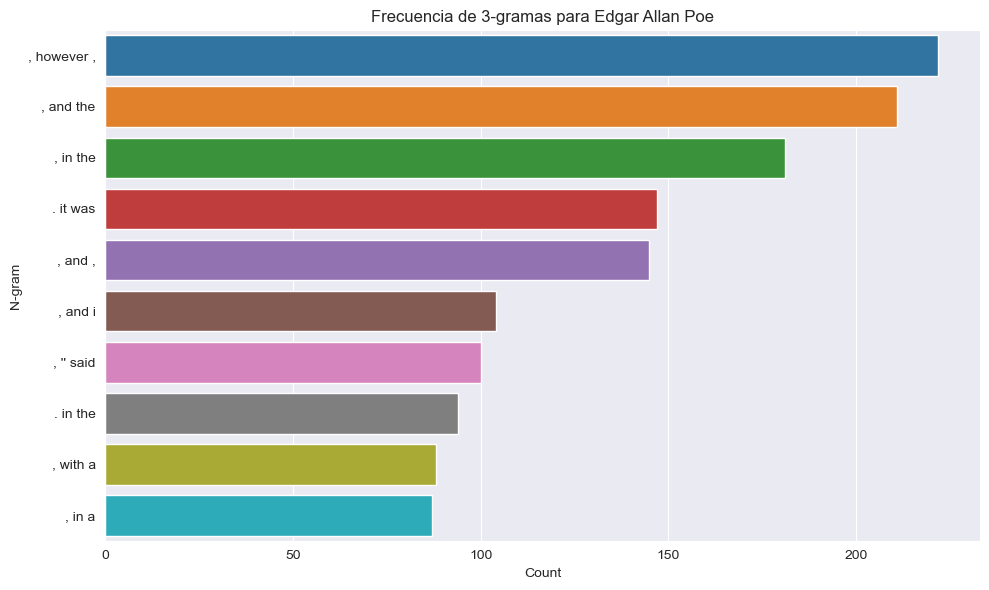

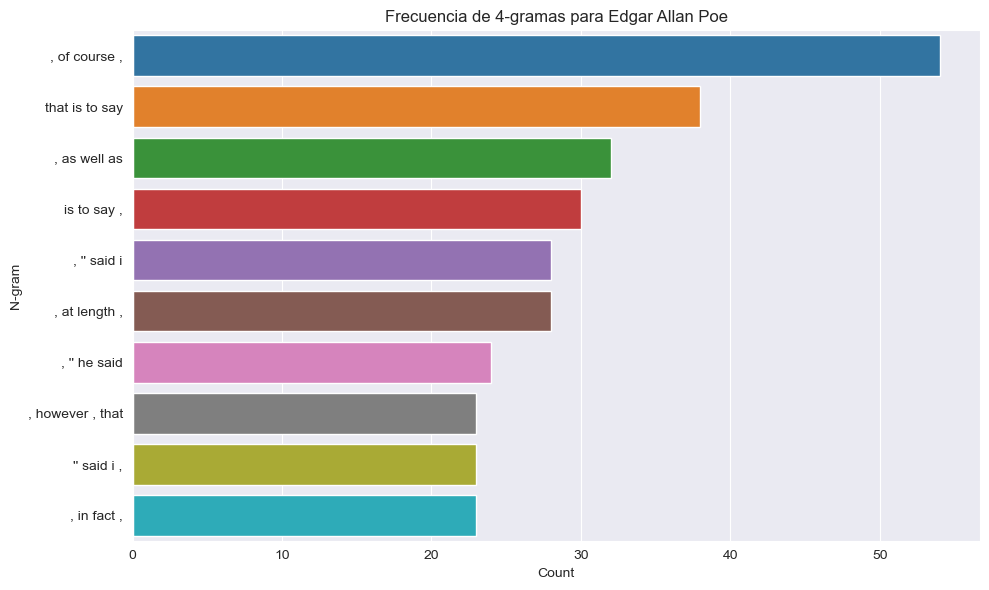

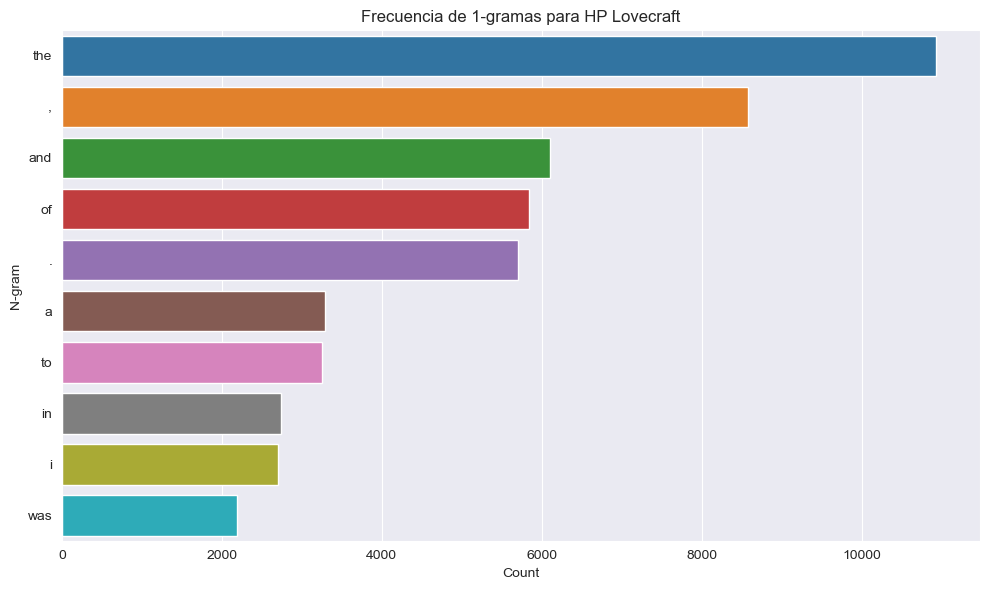

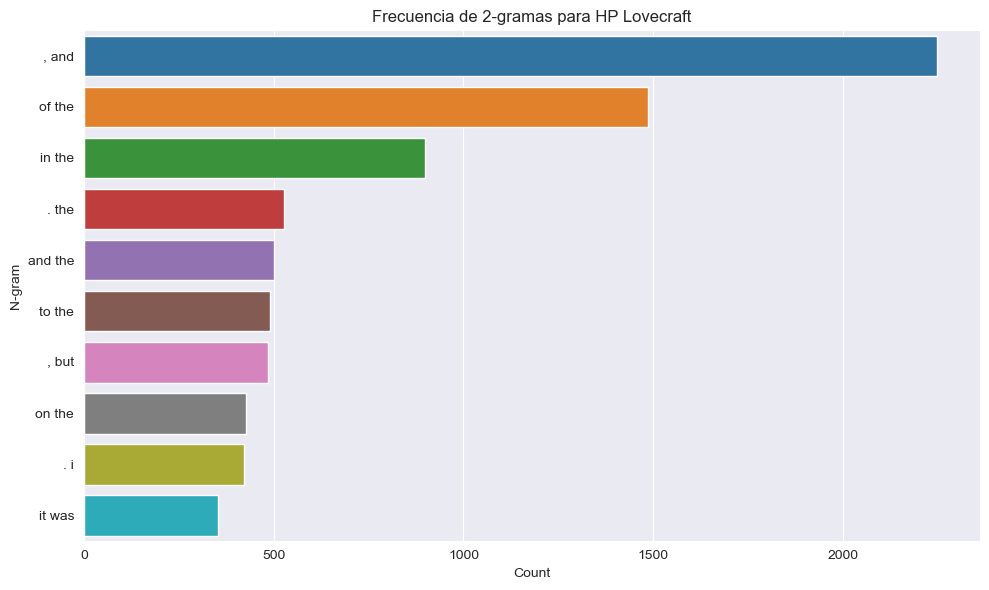

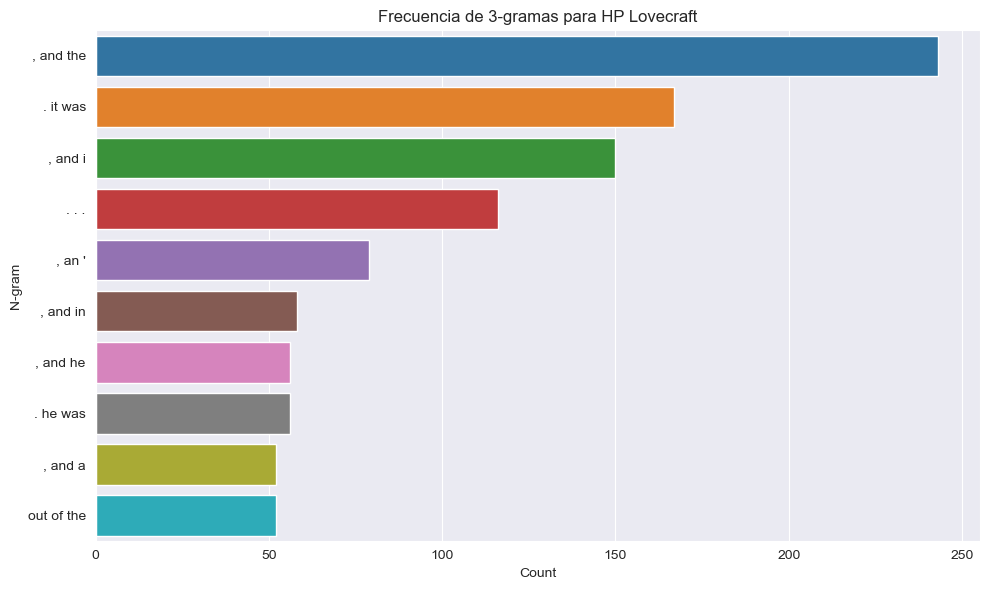

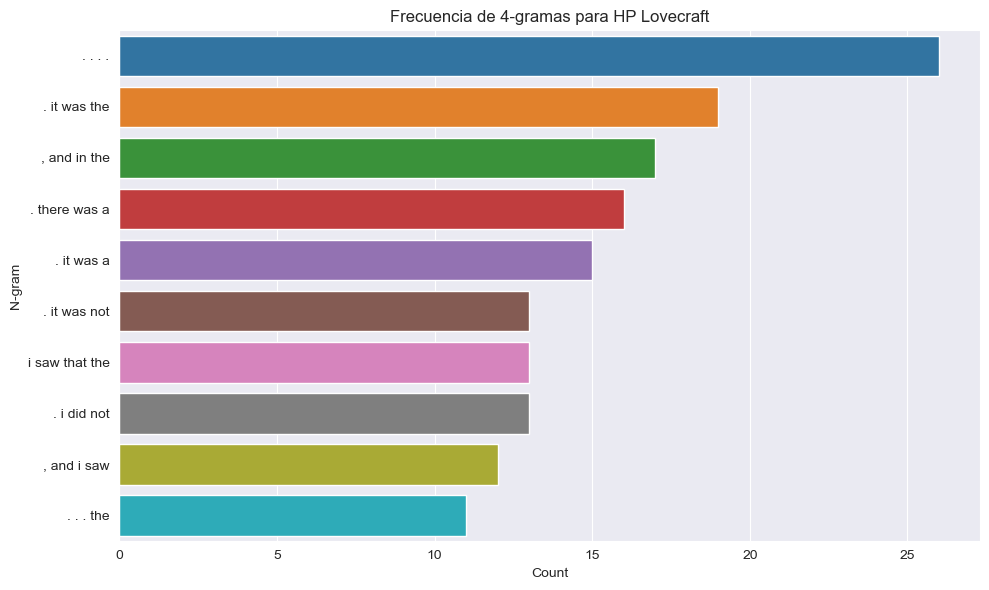

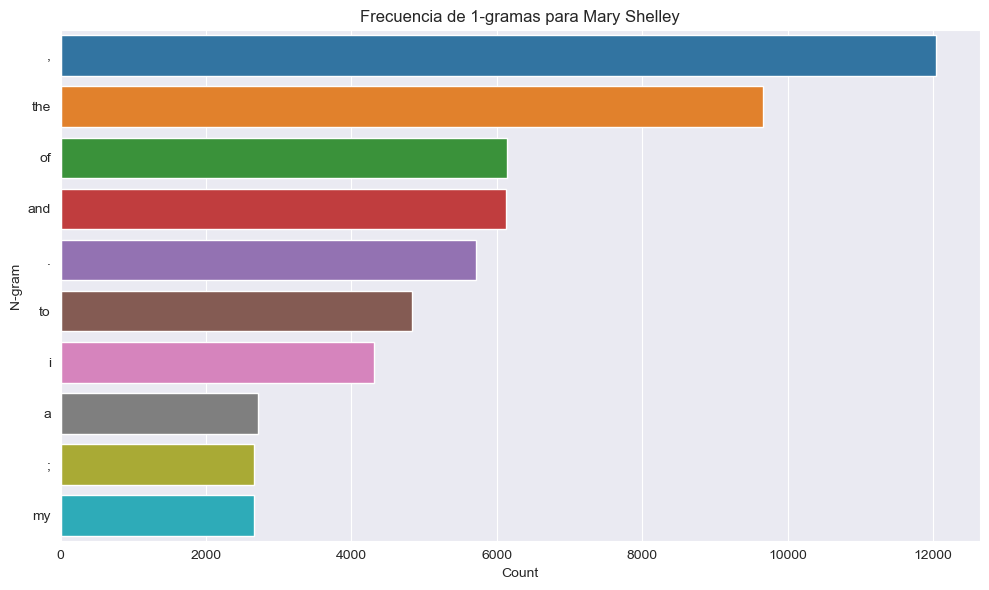

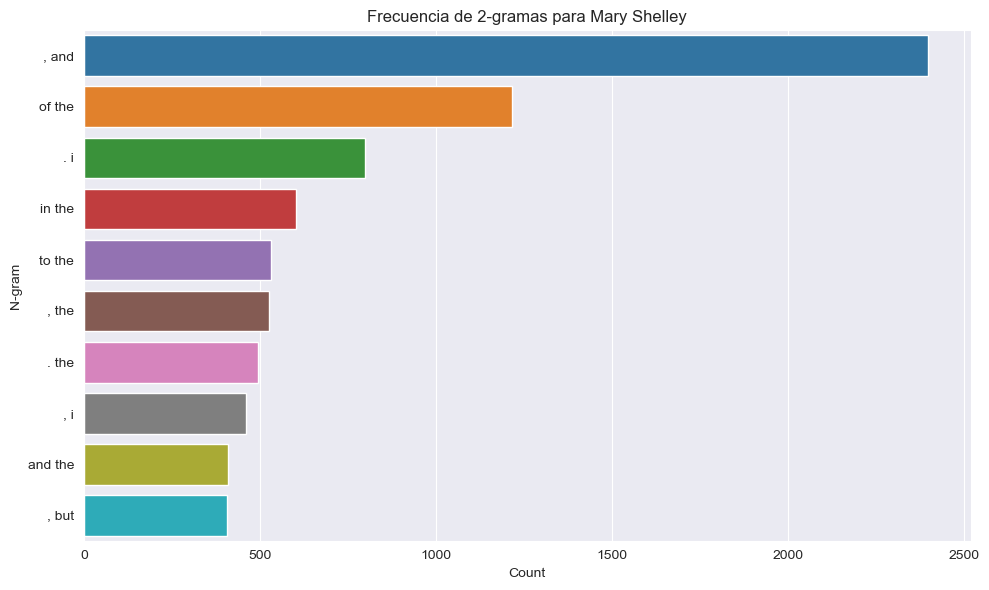

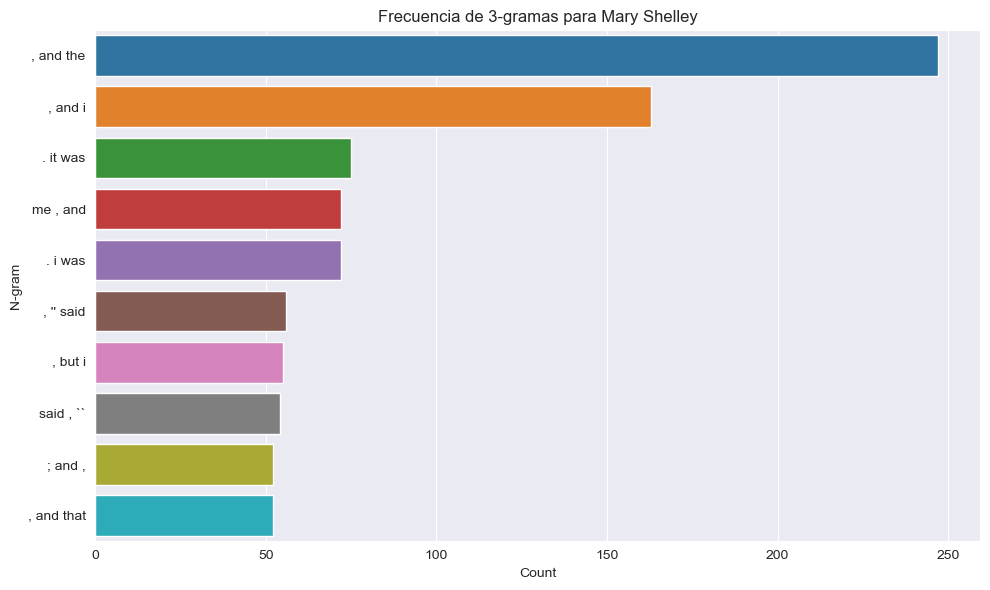

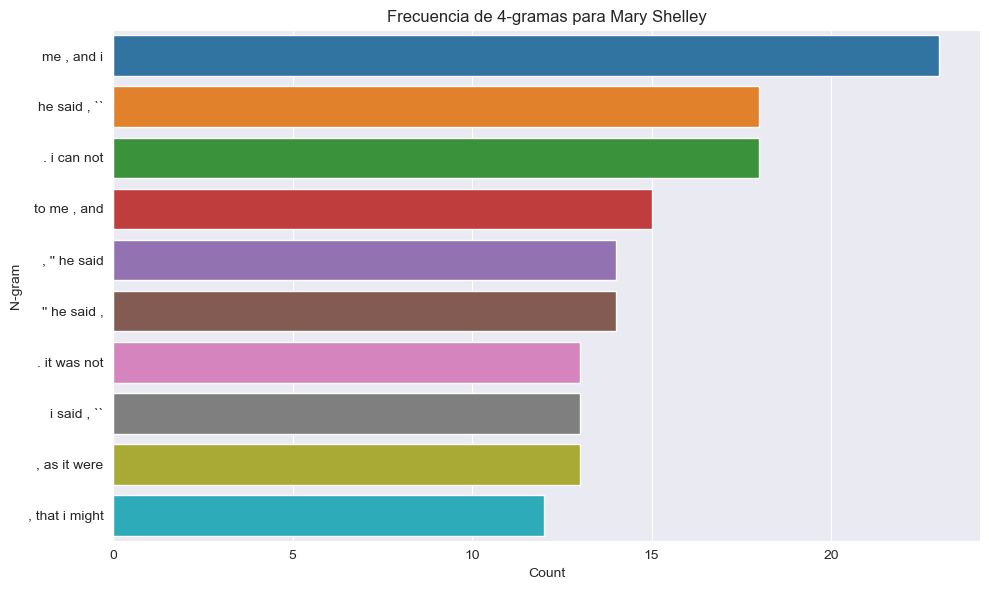

In [40]:
# Lista de autores
autores = df['author'].unique()

# Generar gráficos de barras para cada autor
for autor in autores:
    # Filtrar textos por autor
    texto_autor = ' '.join(df[df['author'] == autor]['text'])

    # Para cada n-grama (1 a 4)
    for n in range(1, 5):
        # Contar los n-gramas
        ngrams_counter = contar_ngrams(texto_autor, n)

        # Graficar los resultados
        graficar_ngrams(ngrams_counter, f'Frecuencia de {n}-gramas para {autor}')

In [41]:
# Crear nubes de palabras para cada autor. Al igual que los graficos de barras, deberan mostrar unigramas, bigramas, trigramas y n-gramas=4 (tetragramas?)


from wordcloud import WordCloud

def generar_nube_palabras(ngrams_counter, titulo):
    # Convertir el formato de los n-gramas a strings para que wordcloud pueda procesarlos
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='viridis',
                          max_words=50).generate_from_frequencies(ngrams_dict)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()




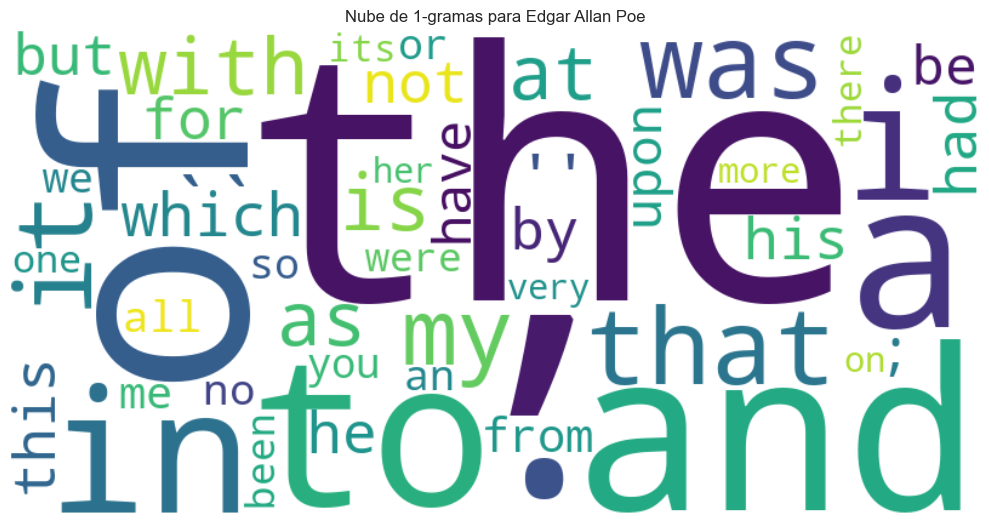

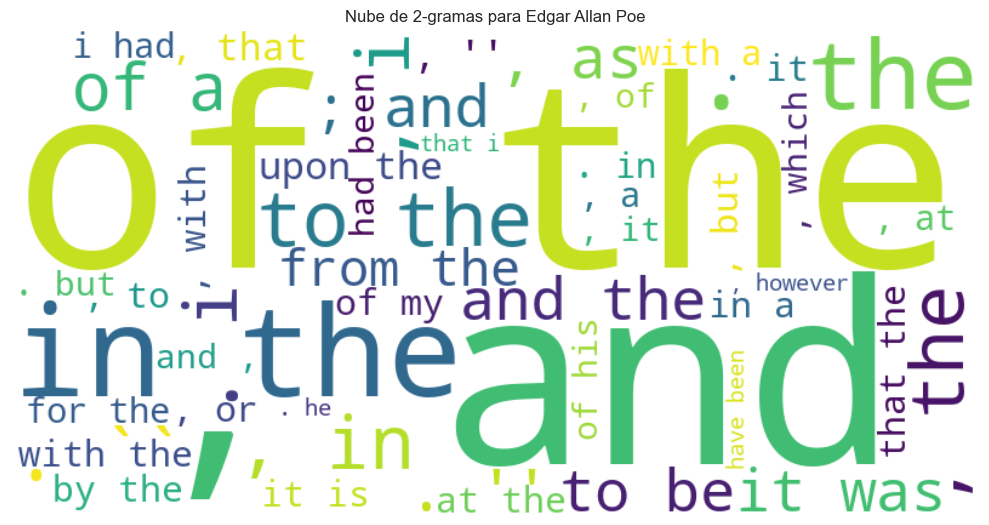

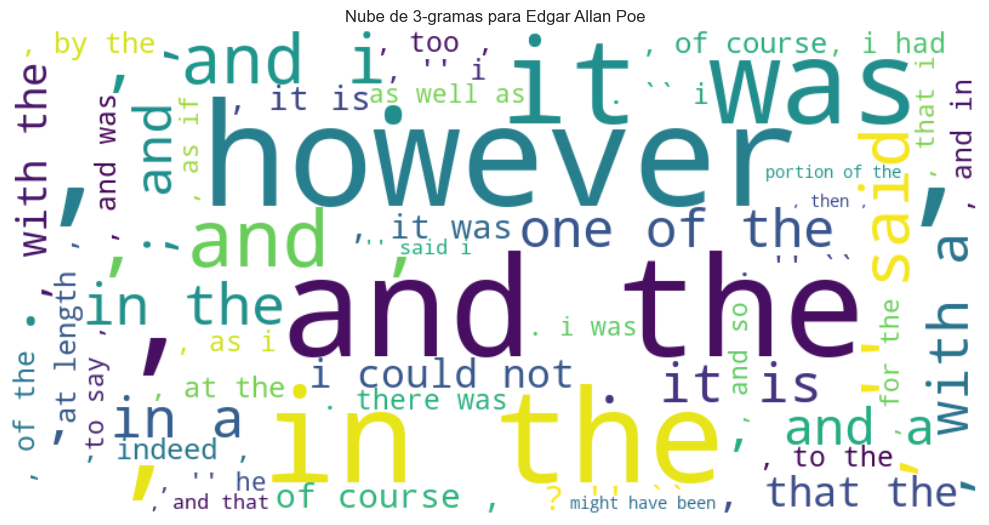

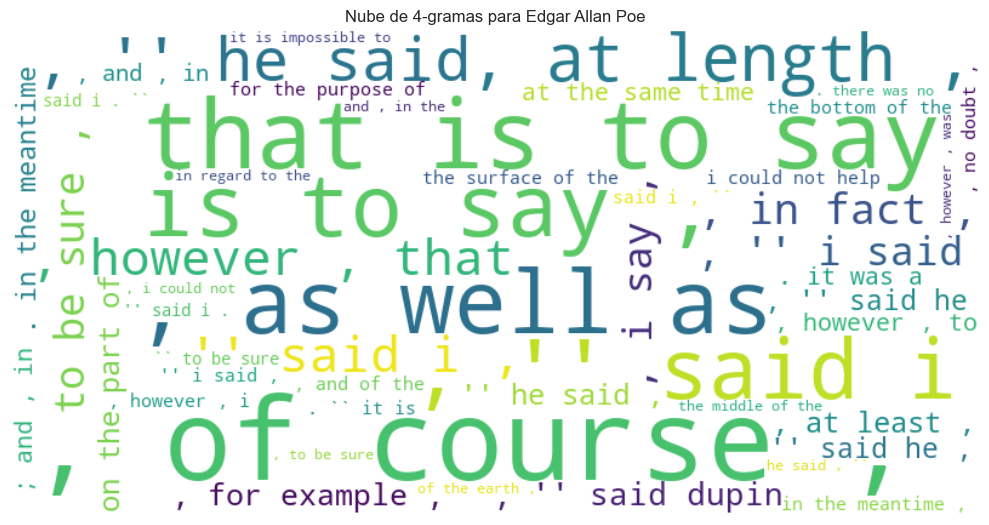

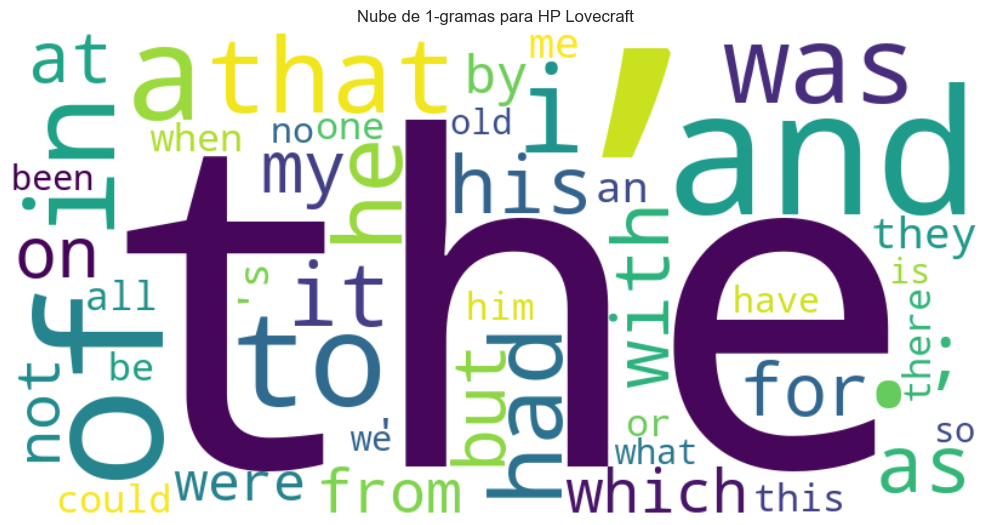

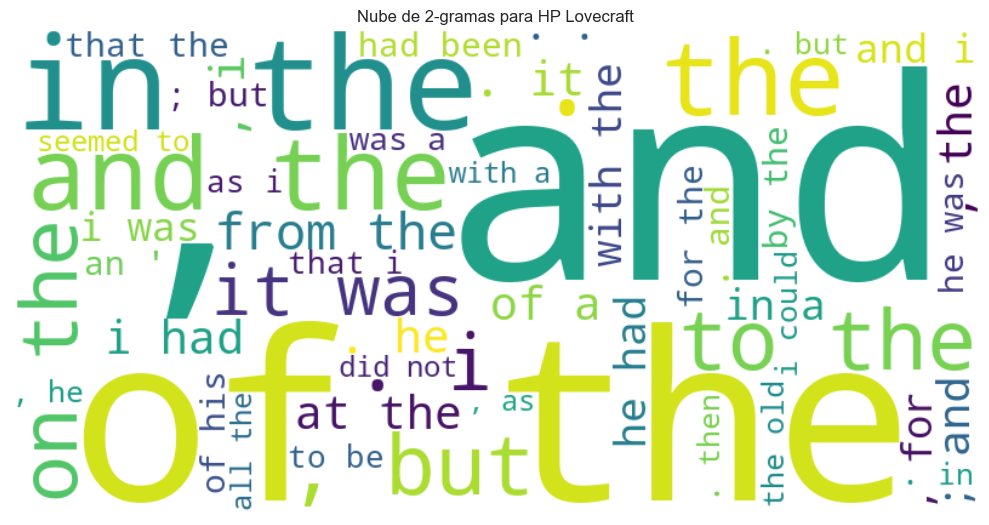

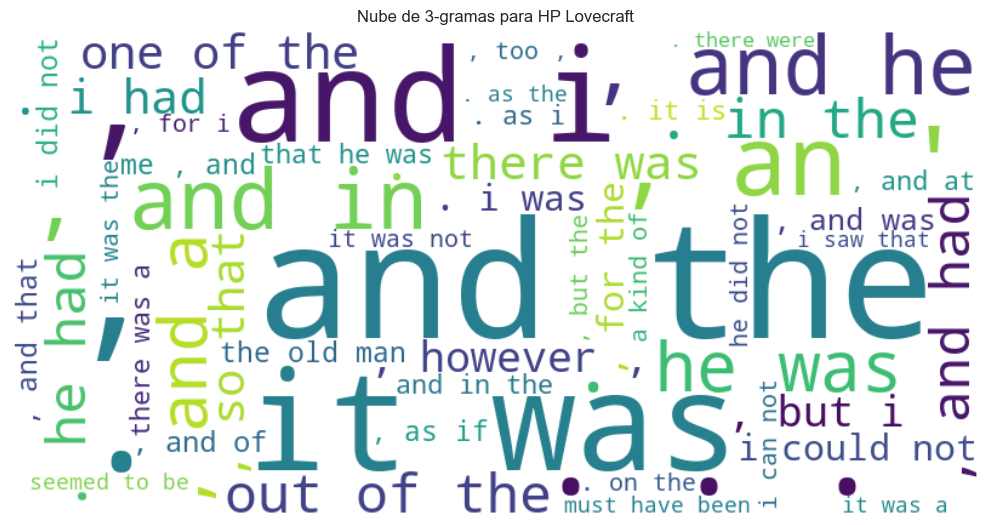

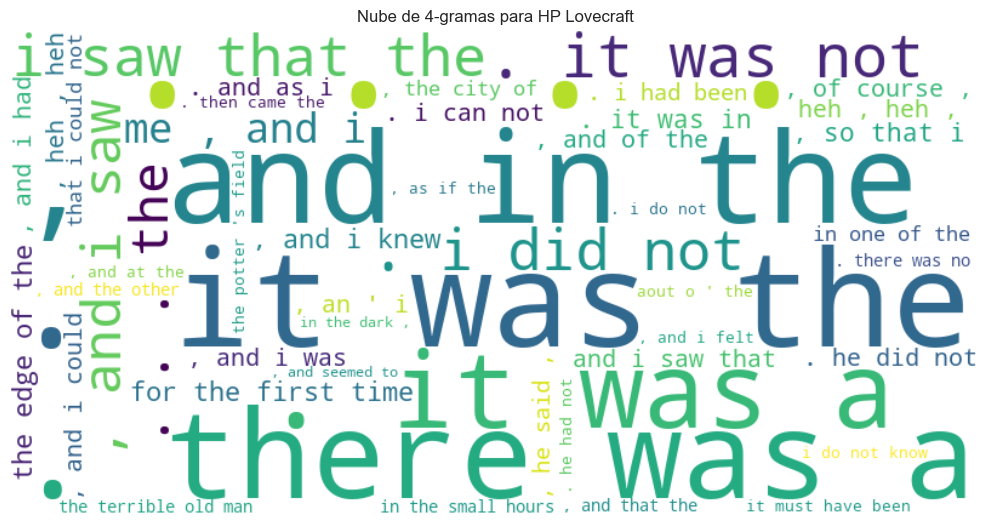

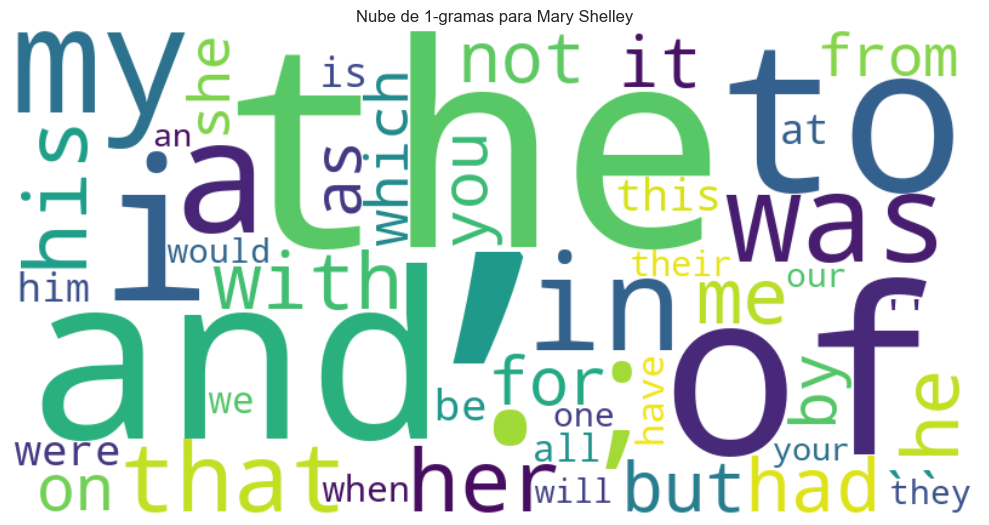

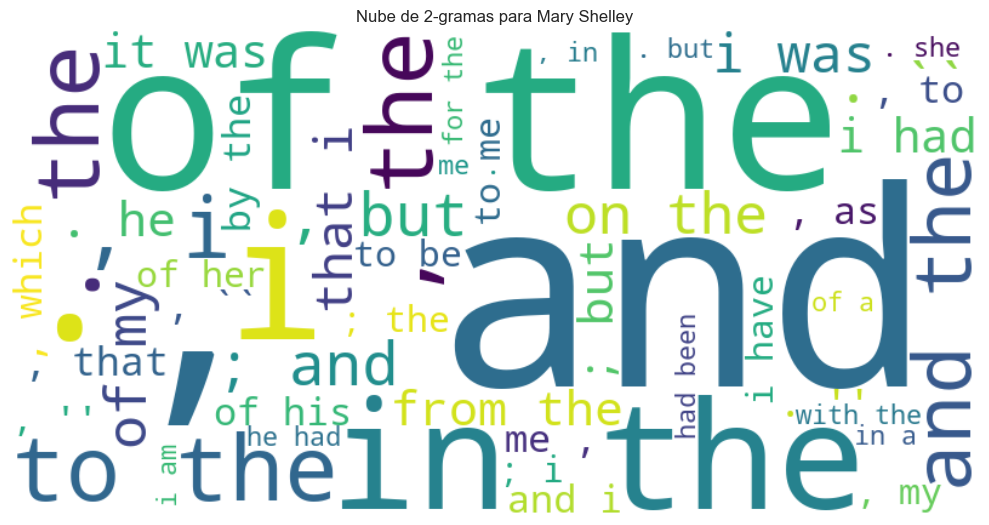

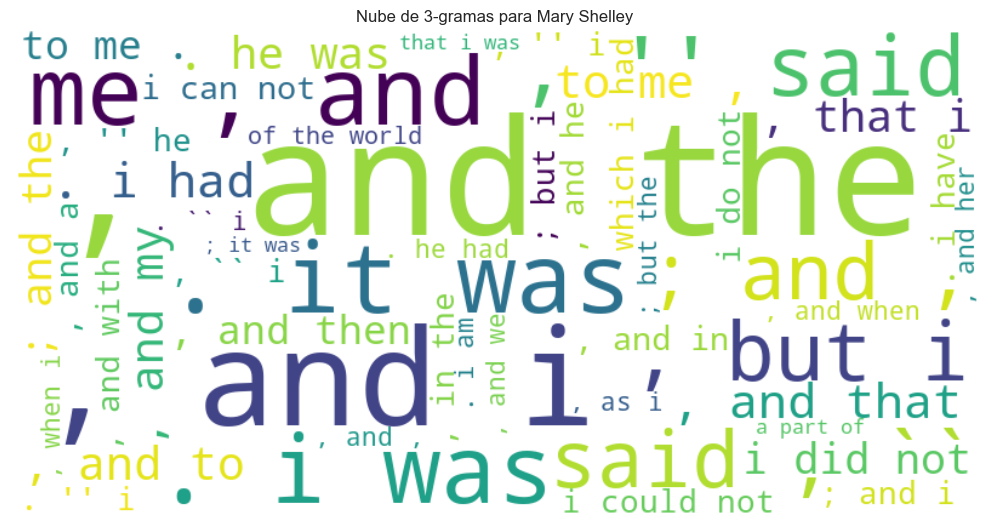

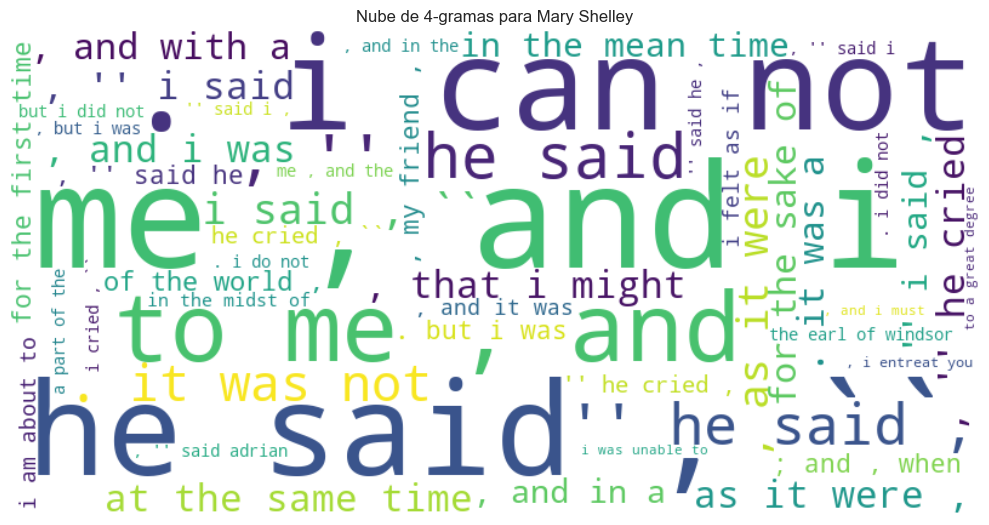

In [42]:
# Generar nubes de palabras para cada autor
for autor in autores:
    # Filtrar textos por autor
    texto_autor = ' '.join(df[df['author'] == autor]['text'])

    # Para cada n-grama (1 a 4)
    for n in range(1, 5):
        # Contar los n-gramas
        ngrams_cloud_counter = contar_ngrams(texto_autor, n)  # Nombre diferente aquí

        # Generar y mostrar la nube de palabras
        generar_nube_palabras(ngrams_cloud_counter, f'Nube de {n}-gramas para {autor}')


In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#5. En una celda nueva, aplicar mascaras a las nubes de palabras generadas. Las mascaras que se sugieren son:
#Para lovecraft
def generar_nube_con_mascara(ngrams_counter, titulo, ruta_mascara):
    # Convertir el formato de los n-gramas a strings
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}

    # Cargar y convertir imagen a RGB para evitar problemas de transparencia
    mascara_img = np.array(Image.open(ruta_mascara).convert('RGB'))

    # Crear la nube de palabras con la máscara
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='viridis',
                          max_words=100,
                          mask=mascara_img,
                          contour_width=1,
                          contour_color='black').generate_from_frequencies(ngrams_dict)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [44]:
mascaras = {
    'HP Lovecraft': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/png-transparent-cthulhu-symbol-cthulhu-miscellaneous-photography-fictional-character.png',
    'Mary Shelley': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/47b50e83011c4e8c945706519a2b7a0f.jpg',
    'Edgar Allan Poe': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/png-transparent-common-raven-raven-black-crow-graphic-fauna-bird-new-caledonian-crow.png'
}


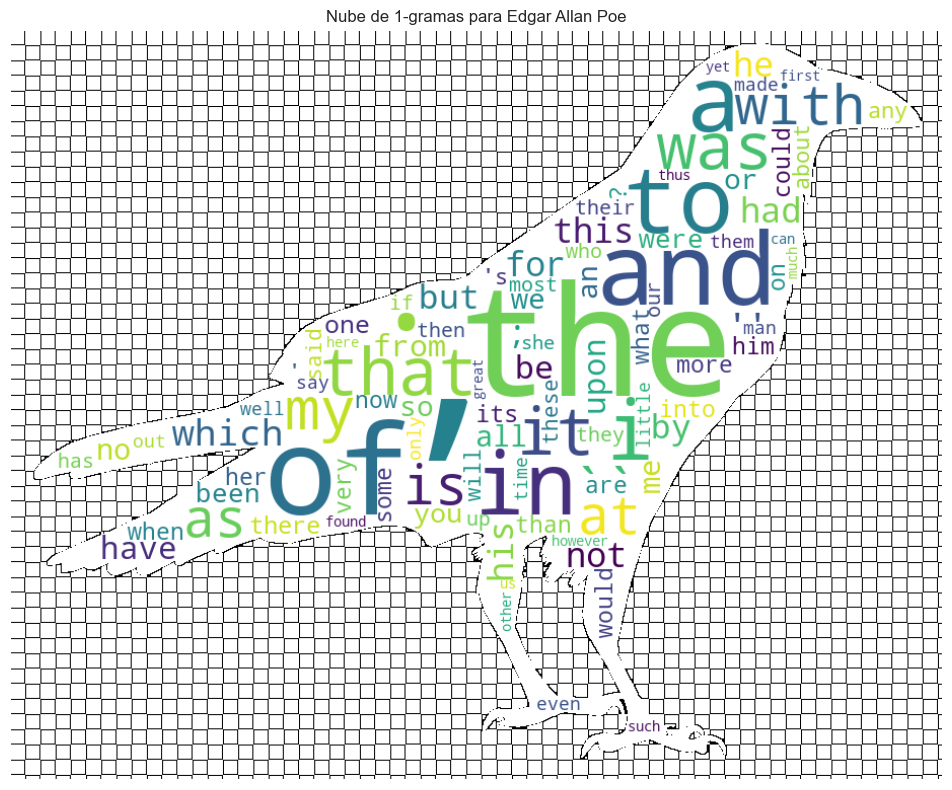

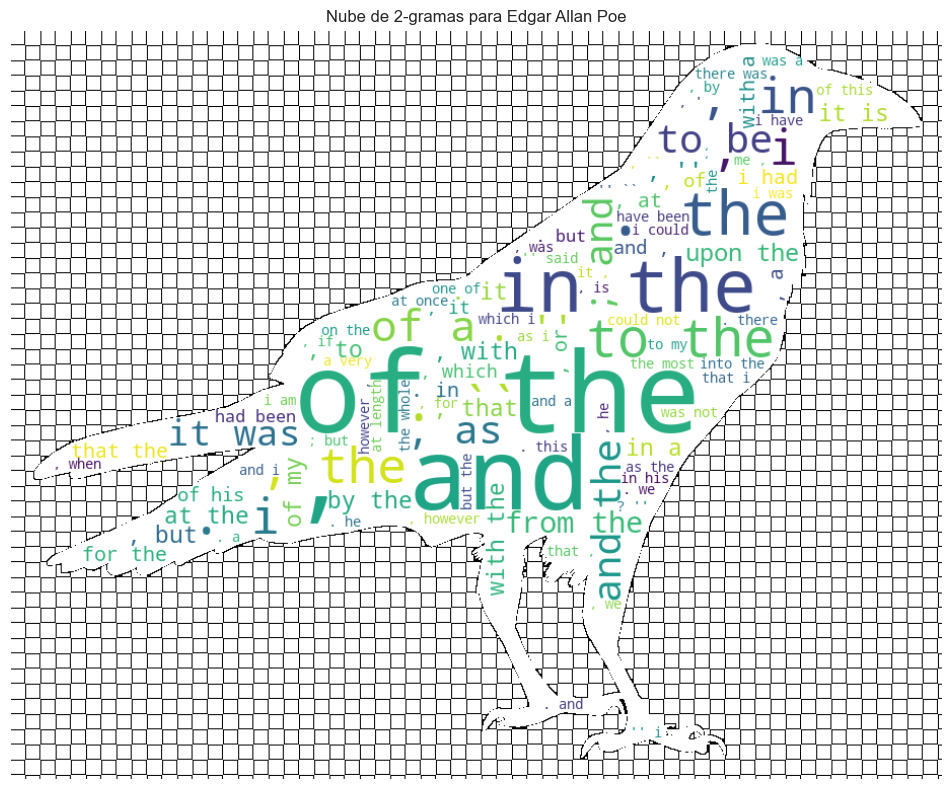

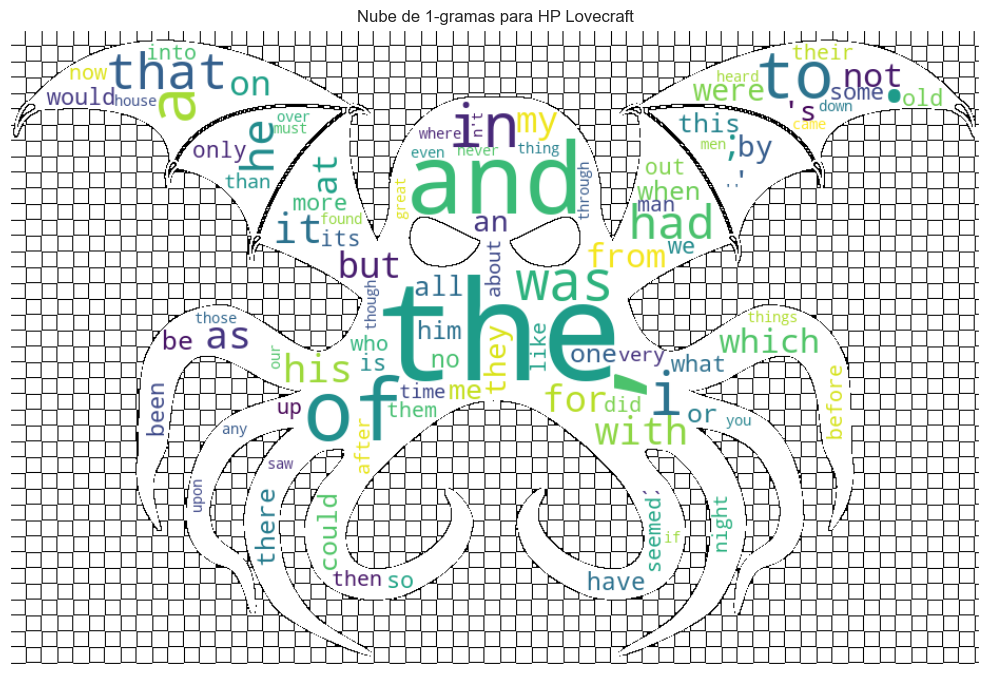

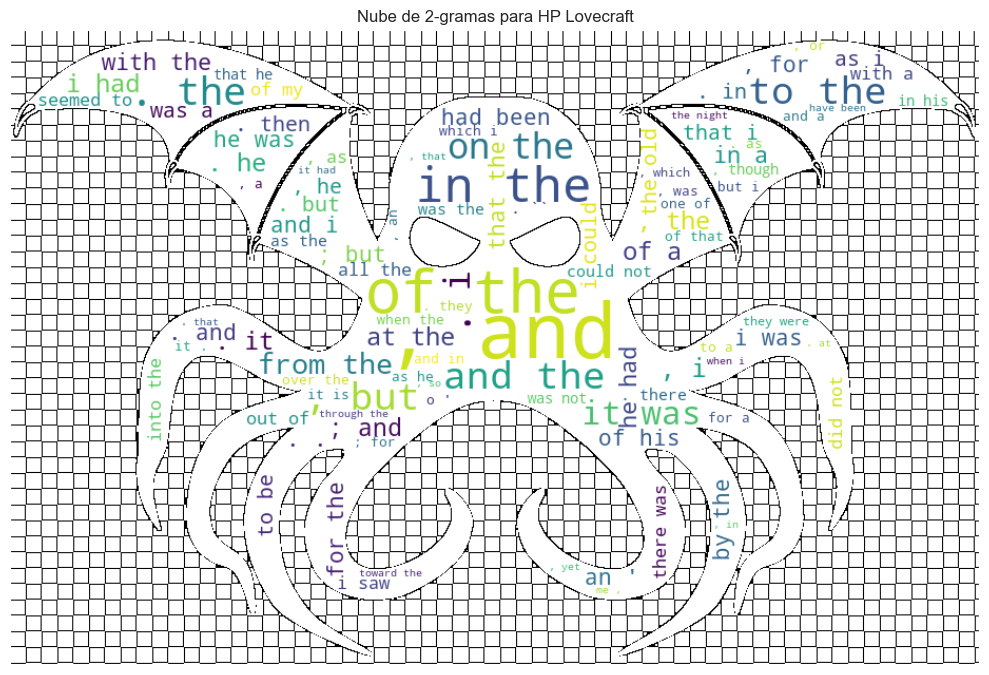

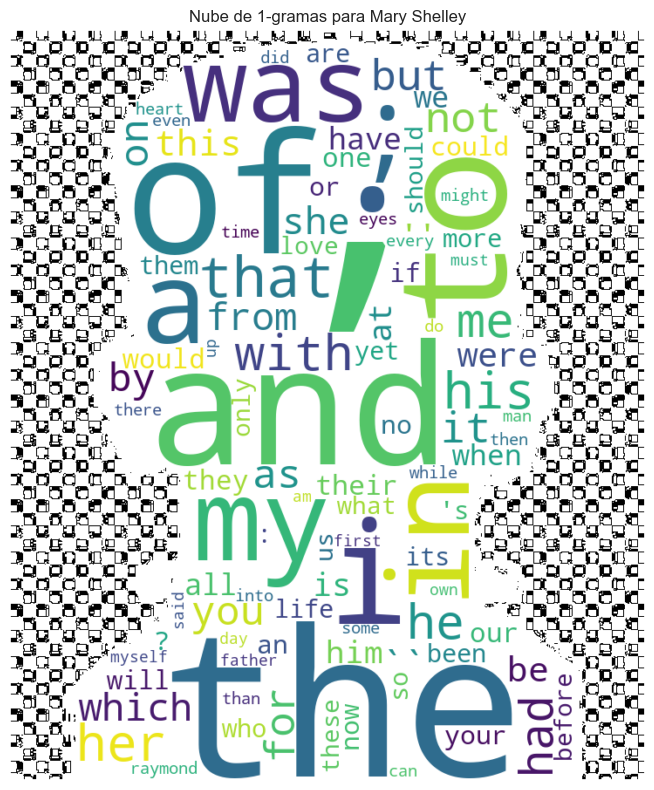

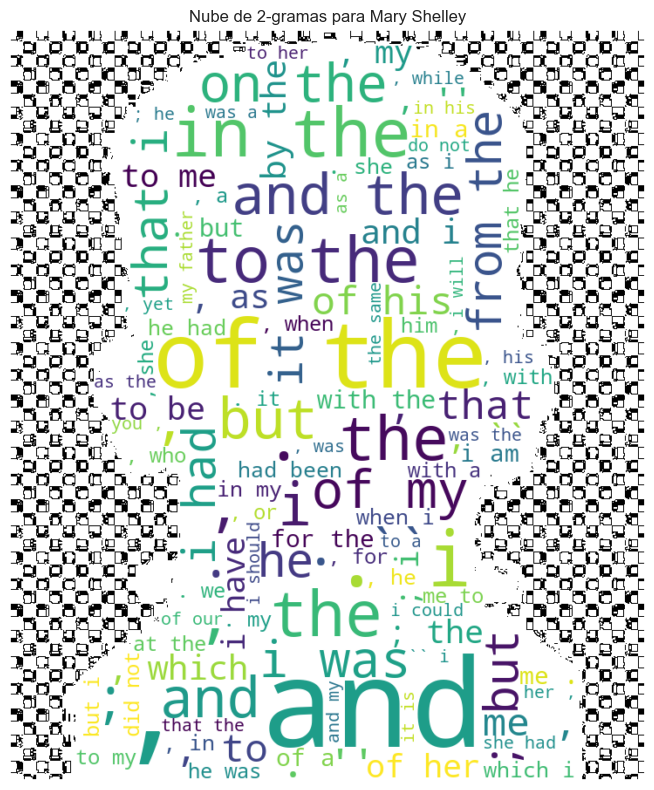

In [45]:
for autor in autores:
    # Filtrar textos por autor
    texto_autor = ' '.join(df[df['author'] == autor]['text'])

    # Para cada n-grama (1 a 2, para no generar demasiados gráficos)
    for n in range(1, 3):
        # Contar los n-gramas
        ngrams_counter = contar_ngrams(texto_autor, n)

        # Generar y mostrar la nube de palabras con máscara
        generar_nube_con_mascara(
            ngrams_counter,
            f'Nube de {n}-gramas para {autor}',
            mascaras[autor]
        )


In [34]:
# Con base en la informacion mostrada por las nubes de palabras y graficos de barras, agregar un comentario explicando las posibles hipotesis generadas (Existe algun tema/palabra recurrente para algun autor en particular, parecieran todos hablar de lo mismo? Y otras observaciones de valor que puedan realizar. Recuerden profundizar en su respuesta)

In [50]:
#Utilizando TSNE, crear un agrupamiento en 2D para observar las relaciones semanticas de los textos analizados (Pueden utilizar word2vec o GloVe para vectorizar)

# Función para vectorizar textos
def vectorizar(texto):
    doc = nlp(texto)
    return doc.vector


In [55]:
# Crear nueva columna de vectores
df['vector'] = df['text'].apply(vectorizar)

# Stackear vectores en matriz
X = np.vstack(df['vector'].values)

# Aplicar t-SNE
modelo = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=3000)
resultado = modelo.fit_transform(X)


/Users/JorgeJimenez/miniconda3/envs/NLP2/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [56]:
# Agregar resultados al DataFrame
df['tsne_1'] = resultado[:, 0]
df['tsne_2'] = resultado[:, 1]


In [57]:
df.head()

author                                               text  \
0  Edgar Allan Poe  This process, however, afforded me no means of...   
1     HP Lovecraft  It never once occurred to me that the fumbling...   
2  Edgar Allan Poe  In his left hand was a gold snuff box, from wh...   
3     Mary Shelley  How lovely is spring As we looked from Windsor...   
4     HP Lovecraft  Finding nothing else, not even gold, the Super...   

                                              vector  tsne-2d-one  \
0  [-0.69416547, 0.26923004, -0.25583163, -0.0466...    49.425678   
1  [-0.7059141, 0.23230337, -0.32001618, -0.02985...     2.775372   
2  [-0.70161027, 0.184129, -0.15260549, -0.057387...   -19.188852   
3  [-0.7477241, 0.09933261, -0.27585968, -0.16815...    -5.887162   
4  [-0.7319843, 0.22035891, -0.24082555, -0.04658...    11.127896   

   tsne-2d-two     tsne_1      tsne_2  
0    58.779087  49.425678   58.779087  
1  -102.288589   2.775372 -102.288589  
2    30.679216 -19.188852   30.679216  
3    39.647606  -5.887162   39.647606  
4   -58.264240  11.127896  -58.264240

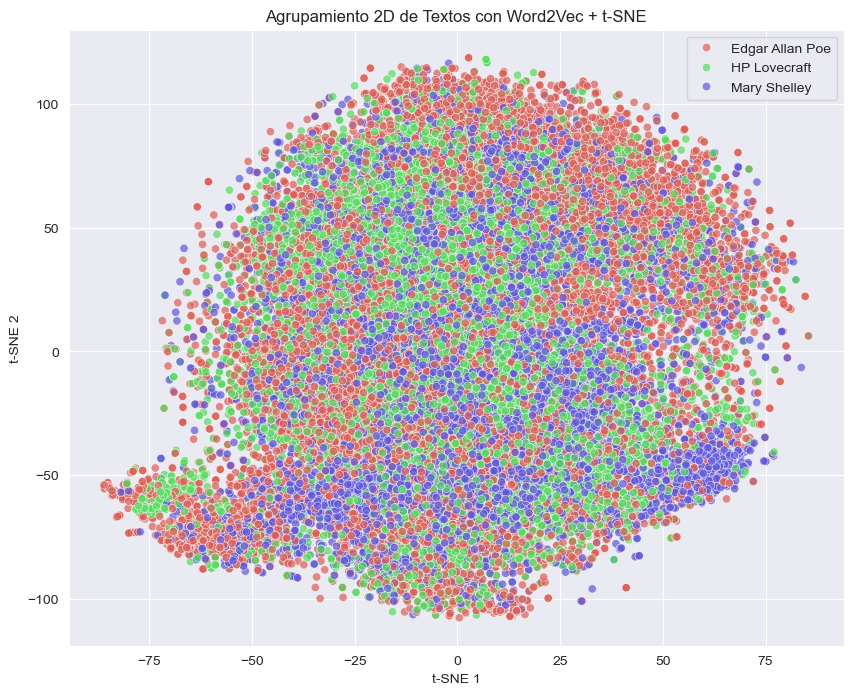

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="author",
    palette=sns.color_palette("hls", len(df['author'].unique())),
    data=df,
    alpha=0.7
)
plt.title('Agrupamiento 2D de Textos con Word2Vec + t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='best')
plt.show()


Con base en la visualziacion generada, poner un comentario con las observaciones que puedan destacar (hay agrupamientos evidentes? Clusteres de algun tema en especifico? Recuerden profundizar en su respuesta)

In [ ]:
#Deberan entrenar dos arquitecturas de red neuronal diferente para clasificacion. Una sera FNN y otra sera CNN, son libres de elegir el numero de capas y el numero de neuronas por capa. Solo recuerden las implicaciones que mover estos parametros tiene.

